In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

In [2]:
crime = pd.read_excel('Data tables - Criminal Incidents Visualistion - year ending September 2017.xlsx', sheet_name = 'Table 05and06')
# filter for only 2015 crime data
crime2015 = crime[crime['Year ending September'] == 2015]
# calculate total crimes for use in boxplot
total_crimes = crime2015.groupby('Local Government Area')['Rate per 100,000 population'].sum()

unemployment = pd.read_excel('Data Sheet.xlsx', sheet_name = 'LGAs', usecols = 'A, CY',skip_footer = 1)
# remove '%' character from strings and convert them to numeric form
for i in range(79):
    unemployment['Unemployment rate'][i] = unemployment['Unemployment rate'][i].replace('%',"")
unemployment['Unemployment rate'] = pd.to_numeric(unemployment['Unemployment rate'])

FileNotFoundError: [Errno 2] No such file or directory: 'Data tables - Criminal Incidents Visualistion - year ending September 2017.xlsx'

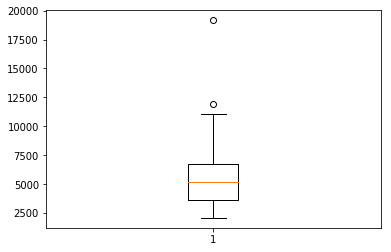

In [3]:
# boxplot of total crimes by LGA
mpl.boxplot(total_crimes)
mpl.show()

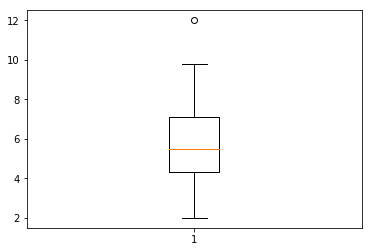

In [4]:
# boxplot of unemployment rate by LGA
mpl.boxplot(unemployment['Unemployment rate'])
mpl.show()

In [5]:
# identifying outliers
# see that printouts here match the outlier values seen in the two above boxplots
print('Outlier 1: LATROBE\nTotal Crimes: ', total_crimes['LATROBE'],'\n')
print('Outlier 2: MELBOURNE\nTotal Crimes: ', total_crimes['MELBOURNE'], '\n')
print('Outlier 3: \n', unemployment.iloc[25])

Outlier 1: LATROBE
Total Crimes:  11902.43770167304 

Outlier 2: MELBOURNE
Total Crimes:  19171.49855818425 

Outlier 3: 
 LGA Name             Greater Dandenong (C)
Unemployment rate                       12
Name: 25, dtype: object


In [6]:
# removing data from Melbourne, Latrobe, and Greater Dandenong
crime2015 = crime2015[(crime2015['Local Government Area'] != 'MELBOURNE') & (crime2015['Local Government Area'] != 'LATROBE') & (crime2015['Local Government Area'] != 'GREATER DANDENONG')]
total_crimes = crime2015.groupby('Local Government Area')['Rate per 100,000 population'].sum()

unemployment = unemployment[(unemployment['LGA Name'] != 'Melbourne (C)') & (unemployment['LGA Name'] != 'Latrobe (C)') & (unemployment['LGA Name'] != 'Greater Dandenong (C)')]

In [7]:
# filtering crime data by offence division, then aggregating by LGA
a_crimes = crime2015[crime2015['Offence Division'] == 'A Crimes against the person']
a_crimes_by_area = a_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

b_crimes = crime2015[crime2015['Offence Division'] == 'B Property and deception offences']
b_crimes_by_area = b_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

c_crimes = crime2015[crime2015['Offence Division'] == 'C Drug offences']
c_crimes_by_area = c_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

d_crimes = crime2015[crime2015['Offence Division'] == 'D Public order and security offences']
d_crimes_by_area = d_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

e_crimes = crime2015[crime2015['Offence Division'] == 'E Justice procedures offences']
e_crimes_by_area = e_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

0.5053108279336423


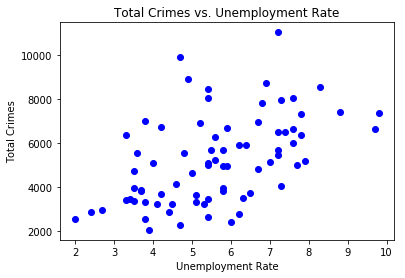

In [8]:
# correlation matrix and scatterplot of unemployment rate vs. total crimes
print(np.corrcoef(unemployment['Unemployment rate'], total_crimes)[0,1])
mpl.scatter(unemployment['Unemployment rate'], total_crimes, color = 'b')
mpl.title('Total Crimes vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Total Crimes')
mpl.show()

0.4126743585263708


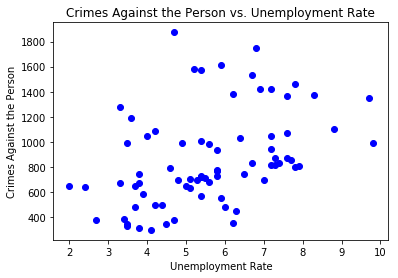

In [9]:
# correlation matrix and scatterplot of unemployment rate vs. crimes against the person
print(np.corrcoef(unemployment['Unemployment rate'], a_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a_crimes_by_area, color = 'b')
mpl.title('Crimes Against the Person vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Crimes Against the Person')
mpl.show()

0.482067726025732


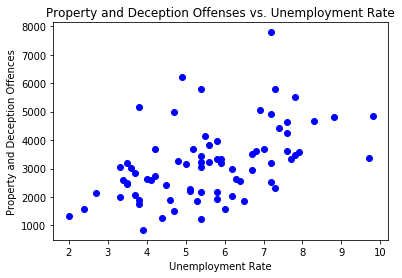

In [10]:
# correlation matrix and scatterplot of unemployment rate vs. property and deception offences
print(np.corrcoef(unemployment['Unemployment rate'], b_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b_crimes_by_area, color = 'b')
mpl.title('Property and Deception Offenses vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Property and Deception Offences')
mpl.show()

0.3116506352884474


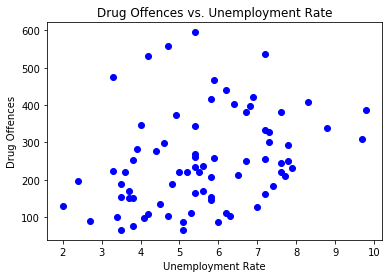

In [11]:
# correlation matrix and scatterplot of unemployment rate vs. drug offences
print(np.corrcoef(unemployment['Unemployment rate'], c_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], c_crimes_by_area, color = 'b')
mpl.title('Drug Offences vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Drug Offences')
mpl.show()

0.2564462815183237


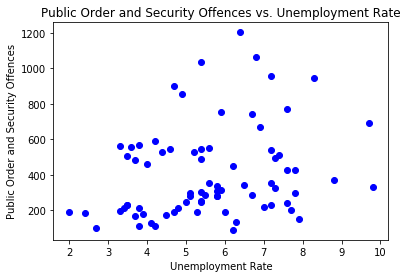

In [12]:
# correlation matrix and scatterplot of unemployment rate vs. public order and security offences
print(np.corrcoef(unemployment['Unemployment rate'], d_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], d_crimes_by_area, color = 'b')
mpl.title('Public Order and Security Offences vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Public Order and Security Offences')
mpl.show()

0.3537029181769322


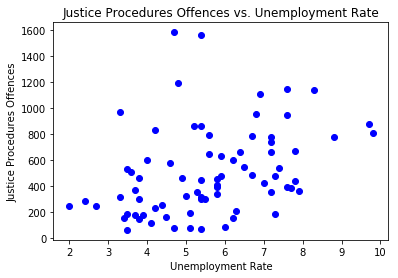

In [13]:
# correlation matrix and scatterplot of unemployment rate vs. justice procedures offences
print(np.corrcoef(unemployment['Unemployment rate'], e_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], e_crimes_by_area, color = 'b')
mpl.title('Justice Procedures Offences vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Justice Procedures Offences')
mpl.show()

In [14]:
#figure out which types of property and deception crimes are prevalent
b_crimes_by_type = b_crimes.groupby('Offence Subdivision')['Rate per 100,000 population'].sum()
print(b_crimes_by_type)

Offence Subdivision
B10 Arson                         5303.292179
B20 Property damage              45132.649703
B30 Burglary/Break and enter     50565.505883
B40 Theft                       126863.514572
B50 Deception                    14504.361760
B60 Bribery                         14.325974
Name: Rate per 100,000 population, dtype: float64


In [15]:
# filtering crime data by offence subdivision, then aggregating by LGA
b10_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B10 Arson']
b10_crimes_by_area = b10_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()
b20_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B20 Property damage']
b20_crimes_by_area = b20_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()
b30_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B30 Burglary/Break and enter']
b30_crimes_by_area = b30_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()
b40_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B40 Theft']
b40_crimes_by_area = b40_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()
b50_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B50 Deception']
b50_crimes_by_area = b50_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()
b60_crimes = b_crimes[b_crimes['Offence Subdivision'] == 'B60 Bribery']
b60_crimes_by_area = b60_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

In [16]:
# figure out which offence subdivisions are missing data for at least one LGA (i.e. <76)
print(len(b10_crimes_by_area))
print(len(b20_crimes_by_area))
print(len(b30_crimes_by_area))
print(len(b40_crimes_by_area))
print(len(b50_crimes_by_area))
print(len(b60_crimes_by_area))

76
76
76
76
75
12


In [17]:
# Towong has no 2015 data for b50 crimes, presumably because none took place
# input the value of 0 for Towong
b50_crimes_by_area = b50_crimes_by_area.set_value('TOWONG', 0)
b50_crimes_by_area = b50_crimes_by_area.sort_index()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# figure out which types of crimes against the person are prevalent
a_crimes_by_type = a_crimes.groupby('Offence Subdivision')['Rate per 100,000 population'].sum()
print(a_crimes_by_type)

Offence Subdivision
A10 Homicide and related offences                        317.860049
A20 Assault and related offences                       42380.604000
A30 Sexual offences                                     9083.022055
A40 Abduction and related offences                       435.797380
A50 Robbery                                             1183.031989
A60 Blackmail and extortion                              135.760673
A70 Stalking, harassment and threatening behaviour      7812.982322
A80 Dangerous and negligent acts endangering people     4373.670010
Name: Rate per 100,000 population, dtype: float64


In [19]:
# filtering crime data by offence subdivision, then aggregating by LGA
a10_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A10 Homicide and related offences']
a10_crimes_by_area = a10_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a20_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A20 Assault and related offences']
a20_crimes_by_area = a20_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a30_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A30 Sexual offences']
a30_crimes_by_area = a30_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a40_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A40 Abduction and related offences']
a40_crimes_by_area = a40_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a50_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A50 Robbery']
a50_crimes_by_area = a50_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a60_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A60 Blackmail and extortion']
a60_crimes_by_area = a60_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a70_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A70 Stalking, harassment and threatening behaviour']
a70_crimes_by_area = a70_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

a80_crimes = a_crimes[a_crimes['Offence Subdivision'] == 'A80 Dangerous and negligent acts endangering people']
a80_crimes_by_area = a80_crimes.groupby('Local Government Area')['Rate per 100,000 population'].sum()

In [20]:
# figure out which offence subdivisions are missing data for at least one LGA (i.e. <76)
print(len(a10_crimes_by_area))
print(len(a20_crimes_by_area))
print(len(a30_crimes_by_area))
print(len(a40_crimes_by_area))
print(len(a50_crimes_by_area))
print(len(a60_crimes_by_area))
print(len(a70_crimes_by_area))
print(len(a80_crimes_by_area))

49
76
76
58
54
43
75
74


In [21]:
# QUEENSCLIFFE has no 2015 data for a70 crimes, presumably because none took place
a70_crimes_by_area = a70_crimes_by_area.set_value('QUEENSCLIFFE', 0)
a70_crimes_by_area = a70_crimes_by_area.sort_index()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [22]:
# QUEENSCLIFFE and HINDMARSH have no 2015 data for a80 crimes, presumably because none took place
a80_crimes_by_area = a80_crimes_by_area.set_value('QUEENSCLIFFE', 0)
a80_crimes_by_area = a80_crimes_by_area.set_value('HINDMARSH', 0)
a80_crimes_by_area = a80_crimes_by_area.sort_index()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


0.41897050194874075


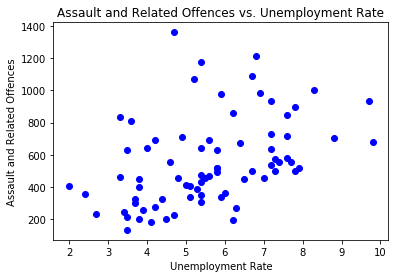

In [23]:
# correlation matrix and scatterplot of unemployment rate vs. assualt and related offences
print(np.corrcoef(unemployment['Unemployment rate'], a20_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a20_crimes_by_area, color = 'b')
mpl.title('Assault and Related Offences vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Assault and Related Offences')
mpl.show()

-0.02171193577544282


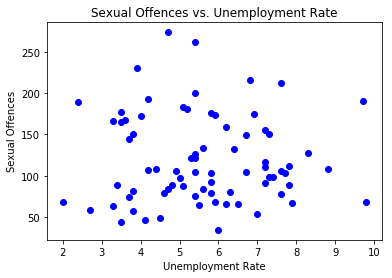

In [24]:
# correlation matrix and scatterplot of unemployment rate vs. sexual offences
print(np.corrcoef(unemployment['Unemployment rate'], a30_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a30_crimes_by_area, color = 'b')
mpl.title('Sexual Offences vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Sexual Offences')
mpl.show()

0.33168062176807084


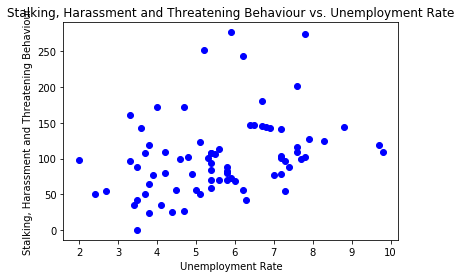

In [25]:
# correlation matrix and scatterplot of unemployment rate vs. stalking, harrassment, and threatening behavior
print(np.corrcoef(unemployment['Unemployment rate'], a70_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a70_crimes_by_area, color = 'b')
mpl.title('Stalking, Harassment and Threatening Behaviour vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Stalking, Harassment and Threatening Behaviour')
mpl.show()

0.35944712480230934


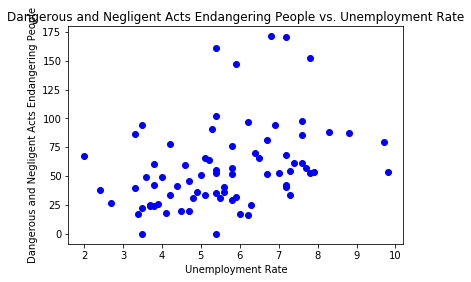

In [26]:
# correlation matrix and scatterplot of unemployment rate vs. dangerous and negligent acts endangering people
print(np.corrcoef(unemployment['Unemployment rate'], a80_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a80_crimes_by_area, color = 'b')
mpl.title('Dangerous and Negligent Acts Endangering People vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Dangerous and Negligent Acts Endangering People')
mpl.show()

0.2720426045436007


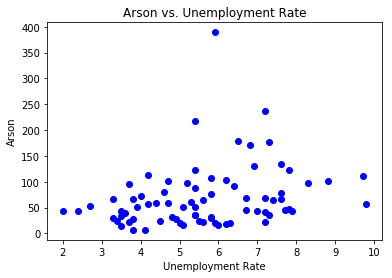

In [27]:
# correlation matrix and scatterplot of unemployment rate vs. arson
print(np.corrcoef(unemployment['Unemployment rate'], b10_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b10_crimes_by_area, color = 'b')
mpl.title('Arson vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Arson')
mpl.show()

0.3112613620486772


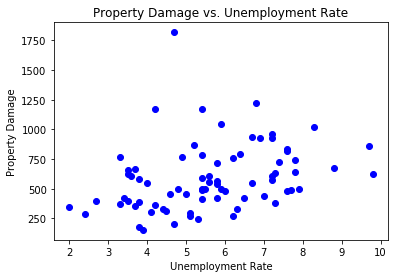

In [28]:
# correlation matrix and scatterplot of unemployment rate vs. property damage
print(np.corrcoef(unemployment['Unemployment rate'], b20_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b20_crimes_by_area, color = 'b')
mpl.title('Property Damage vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Property Damage')
mpl.show()

0.3927428883889132


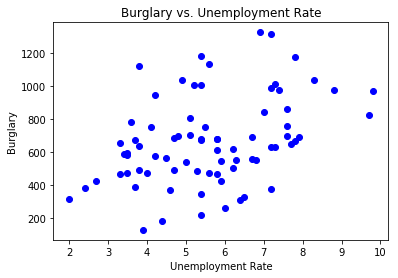

In [29]:
# correlation matrix and scatterplot of unemployment rate vs. burglary
print(np.corrcoef(unemployment['Unemployment rate'], b30_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b30_crimes_by_area, color = 'b')
mpl.title('Burglary vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Burglary')
mpl.show()

0.4434857369299332


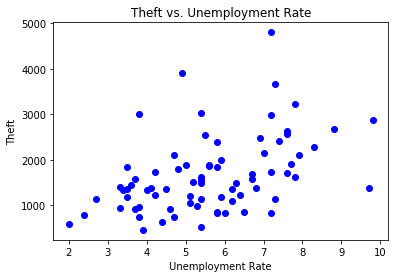

In [30]:
# correlation matrix and scatterplot of unemployment rate vs. theft
print(np.corrcoef(unemployment['Unemployment rate'], b40_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b40_crimes_by_area, color = 'b')
mpl.title('Theft vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Theft')
mpl.show()

0.40634758590667563


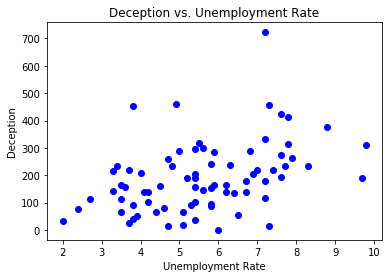

In [31]:
# correlation matrix and scatterplot of unemployment rate vs. deception
print(np.corrcoef(unemployment['Unemployment rate'], b50_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b50_crimes_by_area, color = 'b')
mpl.title('Deception vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Deception')
mpl.show()

In [32]:
# creating array for use in least squares regression
unmp_arr = np.vstack([unemployment['Unemployment rate'], np.ones(len(unemployment['Unemployment rate']))]).T
# running least squares regressions for assault, burglary, theft, and deception
a20_m, a20_c = np.linalg.lstsq(unmp_arr, a20_crimes_by_area, rcond = None)[0]
b30_m, b30_c = np.linalg.lstsq(unmp_arr, b30_crimes_by_area, rcond = None)[0]
b40_m, b40_c = np.linalg.lstsq(unmp_arr, b40_crimes_by_area, rcond = None)[0]
b50_m, b50_c = np.linalg.lstsq(unmp_arr, b50_crimes_by_area, rcond = None)[0]

0.41897050194874075


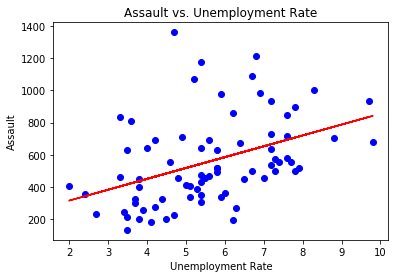

A = 67.6558345146854 * U  +  178.49979052319944


In [33]:
# correlation matrix and scatterplot of unemployment vs. assault with least squares regression line and equation
print(np.corrcoef(unemployment['Unemployment rate'], a20_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], a20_crimes_by_area, color = 'b')
mpl.title('Assault vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Assault')
mpl.plot(unemployment['Unemployment rate'], a20_m*unemployment['Unemployment rate']+a20_c, 'r')
mpl.show()
print('A =', a20_m, '* U  + ', a20_c)

0.3927428883889132


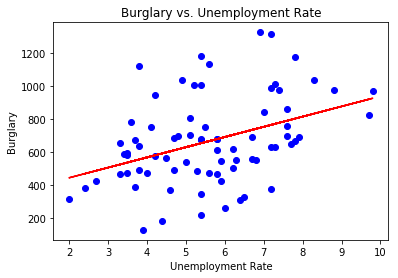

B = 61.700904270758585 * U  +  319.56698360080196


In [34]:
# correlation matrix and scatterplot of unemployment vs. burglary with least squares regression line and equation
print(np.corrcoef(unemployment['Unemployment rate'], b30_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b30_crimes_by_area, color = 'b')
mpl.title('Burglary vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Burglary')
mpl.plot(unemployment['Unemployment rate'], b30_m*unemployment['Unemployment rate']+b30_c, 'r')
mpl.show()
print('B =', b30_m, '* U  + ', b30_c)

0.4434857369299332


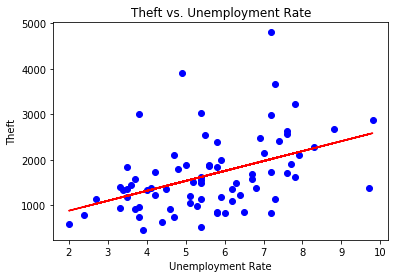

T = 218.41787252135322 * U  +  445.25450875300714


In [35]:
# correlation matrix and scatterplot of unemployment vs. theft with least squares regression line and equation
print(np.corrcoef(unemployment['Unemployment rate'], b40_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b40_crimes_by_area, color = 'b')
mpl.title('Theft vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Theft')
mpl.plot(unemployment['Unemployment rate'], b40_m*unemployment['Unemployment rate']+b40_c, 'r')
mpl.show()
print('T =', b40_m, '* U  + ', b40_c)

0.40634758590667563


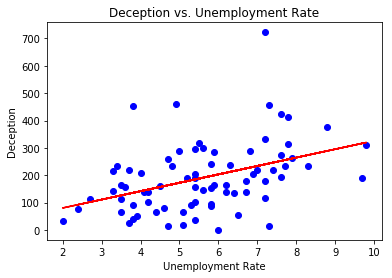

D = 30.704032030683063 * U  +  18.783085758539052


In [36]:
# correlation matrix and scatterplot of unemployment vs. deception with least squares regression line and equation
print(np.corrcoef(unemployment['Unemployment rate'], b50_crimes_by_area)[0,1])
mpl.scatter(unemployment['Unemployment rate'], b50_crimes_by_area, color = 'b')
mpl.title('Deception vs. Unemployment Rate')
mpl.xlabel('Unemployment Rate')
mpl.ylabel('Deception')
mpl.plot(unemployment['Unemployment rate'], b50_m*unemployment['Unemployment rate']+b50_c, 'r')
mpl.show()
print('D =', b50_m, '* U  + ', b50_c)